In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [2]:
df = pd.read_pickle("dfnew.pkl")

In [3]:
df.shape

(2249711, 23)

In [4]:
df = shuffle(df)

In [5]:
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,total_amount,payment_type,trip_type,trip_duration,month,day,total_custom,weekend_Trip,hour,airport
1988776,2017-02-12 21:55:49,2017-02-12 22:02:09,1,74,75,1,1.1,6.5,0.5,0.5,...,7.80,2,1.0,6.333333,2,6,7.80,1,21,0
650356,2017-09-01 13:29:11,2017-09-01 13:31:29,1,145,145,1,0.5,4.0,0.0,0.5,...,6.80,1,1.0,2.300000,9,4,6.80,0,13,0
822186,2017-07-31 20:21:12,2017-07-31 20:23:55,1,173,56,1,0.5,4.0,0.5,0.5,...,5.30,2,1.0,2.716667,7,0,5.30,0,20,0
1504053,2017-04-18 22:18:08,2017-04-18 22:23:03,1,116,166,1,0.9,5.5,0.5,0.5,...,6.86,1,1.0,4.916667,4,1,6.86,0,22,0
2039479,2017-02-05 16:53:48,2017-02-05 16:55:30,1,41,41,1,0.3,3.5,0.0,0.5,...,4.30,2,1.0,1.700000,2,6,4.30,1,16,0


In [6]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['new_date_column'] = df['lpep_pickup_datetime'].dt.date

In [7]:
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,payment_type,trip_type,trip_duration,month,day,total_custom,weekend_Trip,hour,airport,new_date_column
1988776,2017-02-12 21:55:49,2017-02-12 22:02:09,1,74,75,1,1.1,6.5,0.5,0.5,...,2,1.0,6.333333,2,6,7.80,1,21,0,2017-02-12
650356,2017-09-01 13:29:11,2017-09-01 13:31:29,1,145,145,1,0.5,4.0,0.0,0.5,...,1,1.0,2.300000,9,4,6.80,0,13,0,2017-09-01
822186,2017-07-31 20:21:12,2017-07-31 20:23:55,1,173,56,1,0.5,4.0,0.5,0.5,...,2,1.0,2.716667,7,0,5.30,0,20,0,2017-07-31
1504053,2017-04-18 22:18:08,2017-04-18 22:23:03,1,116,166,1,0.9,5.5,0.5,0.5,...,1,1.0,4.916667,4,1,6.86,0,22,0,2017-04-18
2039479,2017-02-05 16:53:48,2017-02-05 16:55:30,1,41,41,1,0.3,3.5,0.0,0.5,...,2,1.0,1.700000,2,6,4.30,1,16,0,2017-02-05


In [8]:
df_1 = df[['day','month','new_date_column','fare_amount','trip_distance']]


In [9]:
df_1.head()
df_1.shape

(2249711, 5)

In [10]:
df_1.head()

,day,month,new_date_column,fare_amount,trip_distance
1988776,6,2,2017-02-12,6.5,1.1
650356,4,9,2017-09-01,4.0,0.5
822186,0,7,2017-07-31,4.0,0.5
1504053,1,4,2017-04-18,5.5,0.9
2039479,6,2,2017-02-05,3.5,0.3


In [11]:
total_fare = (df_1.groupby(['new_date_column','day','month'])["fare_amount","trip_distance"].sum().reset_index())

In [12]:
total_fare.shape

(365, 5)

In [13]:
total_fare.head()


,new_date_column,day,month,fare_amount,trip_distance
0,2017-01-01,6,1,97308.74,24771.4
1,2017-01-02,0,1,54059.56,12880.2
2,2017-01-03,1,1,67148.02,15182.4
3,2017-01-04,2,1,71893.70,16093.1
4,2017-01-05,3,1,75570.80,17015.5


In [14]:
tem = total_fare[total_fare['month']!=12][['day','month','trip_distance']]
print(tem)

     day  month  trip_distance
0      6      1        24771.4
1      0      1        12880.2
2      1      1        15182.4
3      2      1        16093.1
4      3      1        17015.5
5      4      1        18125.6
6      5      1        16924.4
7      6      1        17030.1
8      0      1        17458.5
9      1      1        15841.9
10     2      1        16523.0
11     3      1        16928.4
12     4      1        20518.3
13     5      1        22186.6
14     6      1        19937.7
15     0      1        12973.3
16     1      1        15642.3
17     2      1        15636.9
18     3      1        17154.1
19     4      1        19702.1
20     5      1        21521.7
21     6      1        17988.8
22     0      1        16089.0
23     1      1        15808.7
24     2      1        16653.8
25     3      1        18096.3
26     4      1        20988.3
27     5      1        23301.7
28     6      1        19893.5
29     0      1        15575.4
..   ...    ...            ...
304    2

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
decision = total_fare[['fare_amount']]
features = total_fare[['day', 'month', 'trip_distance']]
train = total_fare[total_fare['month']!=12][['day','month','trip_distance']]
train_d = total_fare[total_fare['month']!=12][['fare_amount']]
test = total_fare[total_fare['month']==12][['day','month','trip_distance']]
test_d = total_fare[total_fare['month']==12][['fare_amount']]


In [16]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
rfr = RF.fit(train, train_d.values.ravel())

In [17]:
test_rfr = RF.predict(test)
test_rfr #forecasting fare_amount

array([67525.991, 73731.87 , 60307.133, 52552.257, 57923.945, 58125.47 ,
       58277.743, 66155.076, 65980.746, 57309.666, 53918.443, 55080.453,
       57245.534, 58458.054, 61696.541, 72614.222, 57736.113, 54719.292,
       57047.923, 59159.175, 63958.852, 66006.195, 56750.345, 46632.086,
       35316.689, 35316.689, 45603.252, 45125.454, 50926.902, 44699.174,
       57263.308])

In [18]:
test_d # fare_amount

,fare_amount
334,70622.61
335,75151.50
336,59013.25
337,51673.30
338,58848.93
339,58201.90
340,60819.90
341,68873.35
342,63169.70
343,52557.91


Text(0,0.5,'fare_amount')

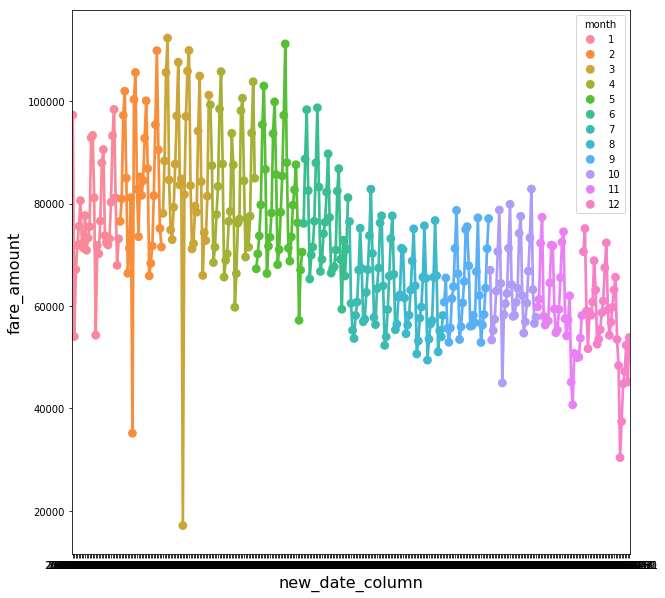

In [19]:
plt.figure(figsize=(10,10))
sns.pointplot(x='new_date_column',y='fare_amount',data=total_fare,kind='point',hue='month')
plt.xlabel('new_date_column',fontsize=16)
plt.ylabel('fare_amount',fontsize=16)

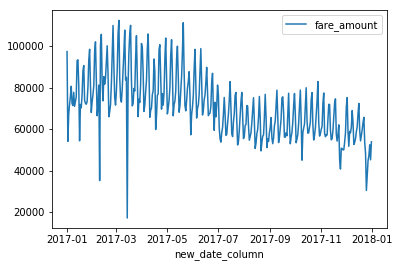

In [20]:
lines = total_fare.plot.line(x='new_date_column', y='fare_amount')

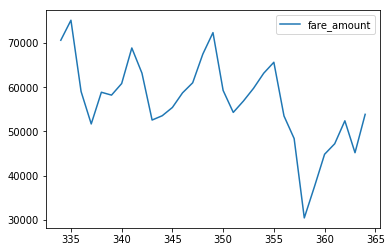

In [21]:
lines = test_d.plot.line()

In [22]:
test_d['fare_amount']=test_rfr

In [23]:
test_d.head()

,fare_amount
334,67525.991
335,73731.870
336,60307.133
337,52552.257
338,57923.945


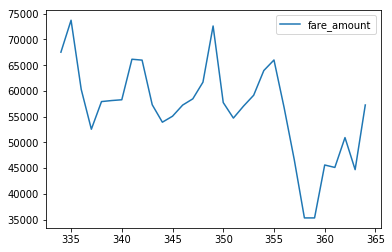

In [24]:
lines = test_d.plot.line()